In [4]:
!pip install rpy2
!pip install pandas
!pip install numpy
!pip install keras
!pip install tensorflow
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [8]:
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
import os

# Activate the automatic conversion between R objects and pandas DataFrames
pandas2ri.activate()

# Specify the path to your .RData file
rdata_path = 'sample_data/final.Rdata'

# Load the RData file
robjects.r['load'](rdata_path)

# Print all object names in the R environment
r_objects = robjects.r['ls']()
print("Objects in RData:", r_objects)



# List all objects in the R environment to find the data frame names
r_objects = list(robjects.r.objects())
print("R objects in the file:", r_objects)

# Access the data frame (replace 'data_frame_name' with the actual name)
r_df = robjects.r['dataset_definitive']

print(type(r_df))
# Convert the R data frame to a pandas DataFrame

# Display the DataFrame
print(r_df.head())


Objects in RData: [1] "dataset_definitive"

R objects in the file: ['dataset_definitive']
<class 'pandas.core.frame.DataFrame'>
  dec_code  dec_dur  nbr_of_charges base_city_code  nbr_of_applications  \
1  REMOVAL    612.0             1.0            NYC                  3.0   
2  REMOVAL    392.0             1.0            NYC                  3.0   
3    GRANT   2349.0             1.0            NYC                  3.0   
4  REMOVAL    493.0             1.0            NYC                  3.0   
5    GRANT   1688.0             1.0            NYC                  3.0   

   nbr_of_schedules custody  crim_ind  nbr_of_appeals  attorney_pres  \
1               2.0       R       0.0             1.0            1.0   
2               2.0       R       0.0             2.0            1.0   
3               3.0       R       0.0             0.0            1.0   
4               3.0       R       0.0             1.0            1.0   
5               8.0       D       0.0             2.0        

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import BackupAndRestore, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

histories = {}

tf.keras.utils.set_random_seed(42)

# Split features (X) and target (y)
X = r_df.drop(columns=['dec_code'])
y = r_df['dec_code']

print(X.head())

# Encode categorical columns in X as integer labels
#for col in X.select_dtypes(include=['category']).columns:
#    X[col] = X[col].cat.codes  # Convert category to integer codes
X = pd.get_dummies(X, drop_first=False)

print(X.head())

# One-hot encode the target variable y
y = pd.get_dummies(y).to_numpy()  # Converts y to one-hot encoded matrix for categorical crossentropy

# Split into training and testing sets (90% training, 10% testing)
x_train, x_test, y_train, y_test = train_test_split(X.to_numpy(), y, test_size=0.1, random_state=42)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

   dec_dur  nbr_of_charges base_city_code  nbr_of_applications  \
1    612.0             1.0            NYC                  3.0   
2    392.0             1.0            NYC                  3.0   
3   2349.0             1.0            NYC                  3.0   
4    493.0             1.0            NYC                  3.0   
5   1688.0             1.0            NYC                  3.0   

   nbr_of_schedules custody  crim_ind  nbr_of_appeals  attorney_pres  \
1               2.0       R       0.0             1.0            1.0   
2               2.0       R       0.0             2.0            1.0   
3               3.0       R       0.0             0.0            1.0   
4               3.0       R       0.0             1.0            1.0   
5               8.0       D       0.0             2.0            1.0   

  ij_gender  yr_app      party region_grouped  years_on_bench  
1    female  1995.0  Democrats         Europe            29.0  
2      male  1998.0  Democrats         Eur

In [7]:



## Testing different activaction functions, and see best result

# Testing different activation functions
for act in ['relu', 'sigmoid', 'tanh']:
    print(f"Training with activation function: {act}")

    # Define the neural network model
    nn3 = Sequential([
        Dense(64, activation=act, input_shape=(x_train.shape[1],)),
        Dense(32, activation=act),
        Dense(16, activation=act),
        Dense(y_train.shape[1], activation='softmax')
    ])

    # Compile the model
    nn3.compile(
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model and save the history
    history = nn3.fit(
        x_train, y_train,
        epochs=15,
        batch_size=128,
        validation_split=0.1,
        verbose=1  # Suppress detailed logs
    )

    # Store history for this activation function
    histories[act] = history.history

    # Evaluate the model
    nn3.evaluate(x_test, y_test, verbose=1)

# Plotting accuracy for different activation functions
plt.figure(figsize=(10, 6))
for act, history in histories.items():
    plt.plot(history['accuracy'], label=f'{act} - Training')
    plt.plot(history['val_accuracy'], linestyle='--', label=f'{act} - Validation')

plt.title('Model Accuracy for Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'r_df' is not defined

Training Without Batch Normalization...
Epoch 1/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7926 - loss: 0.5222 - val_accuracy: 0.8240 - val_loss: 0.4532
Epoch 2/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8269 - loss: 0.4418 - val_accuracy: 0.8295 - val_loss: 0.4381
Epoch 3/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8300 - loss: 0.4319 - val_accuracy: 0.8322 - val_loss: 0.4311
Epoch 4/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8317 - loss: 0.4266 - val_accuracy: 0.8329 - val_loss: 0.4271
Epoch 5/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8330 - loss: 0.4231 - val_accuracy: 0.8336 - val_loss: 0.4252
Epoch 6/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8341 - loss: 0.4207 - val_accuracy: 0.8335 - val_loss: 0.4239
Epoch 7/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8350 - loss: 0.4190 - val_accuracy: 0.8339 - val_loss: 0.4228
Epoch 8/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/s

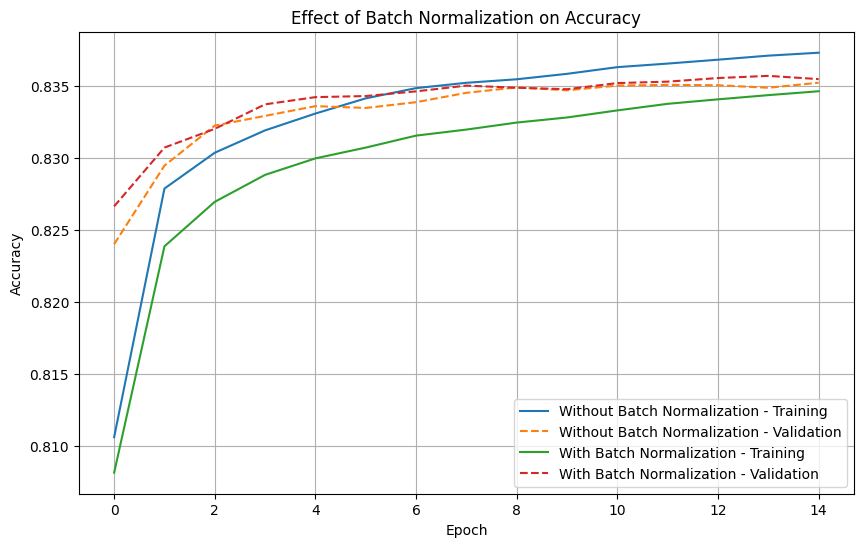

In [25]:
# Dictionary to store histories
histories_bn = {}

# Define two scenarios: without batch normalization and with batch normalization. Compare the two epoch by epoch to choose best option
scenarios = {
    'Without Batch Normalization': lambda: Sequential([
        Dense(64, activation='tanh', input_shape=(x_train.shape[1],)),
        Dense(32, activation='tanh'),
        Dense(16, activation='tanh'),
        Dense(y_train.shape[1], activation='softmax')
    ]),
    'With Batch Normalization': lambda: Sequential([
        Dense(64, activation='tanh', input_shape=(x_train.shape[1],)),
        tf.keras.layers.BatchNormalization(),
        Dense(32, activation='tanh'),
        tf.keras.layers.BatchNormalization(),
        Dense(16, activation='tanh'),
        tf.keras.layers.BatchNormalization(),
        Dense(y_train.shape[1], activation='softmax')
    ])
}

for scenario, model_fn in scenarios.items():
    print(f"Training {scenario}...")
    # Define the model using the appropriate lambda function
    model = model_fn()

    # Compile the model
    model.compile(
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model
    history = model.fit(
        x_train, y_train,
        epochs=15,
        batch_size=128,
        validation_split=0.1,
        verbose=1  # Suppress detailed logs
    )

    # Store the history
    histories_bn[scenario] = history.history

# Plotting results
plt.figure(figsize=(10, 6))
for scenario, history in histories_bn.items():
    plt.plot(history['accuracy'], label=f'{scenario} - Training')
    plt.plot(history['val_accuracy'], linestyle='--', label=f'{scenario} - Validation')

plt.title('Effect of Batch Normalization on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#ci sta quello che troviamo perchè abbiamo poche variabili numeriche, quindi non normalizza granchè

Training with learning rate: 0.001...
Epoch 1/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7850 - loss: 0.5304 - val_accuracy: 0.8267 - val_loss: 0.4437
Epoch 2/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8273 - loss: 0.4403 - val_accuracy: 0.8308 - val_loss: 0.4321
Epoch 3/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8304 - loss: 0.4309 - val_accuracy: 0.8322 - val_loss: 0.4279
Epoch 4/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8324 - loss: 0.4263 - val_accuracy: 0.8332 - val_loss: 0.4255
Epoch 5/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8334 - loss: 0.4234 - val_accuracy: 0.8331 - val_loss: 0.4237
Epoch 6/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8341 - loss: 0.4212 - val_accuracy: 0.8332 - val_loss: 0.4223
Epoch 7/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8348 - loss: 0.4195 - val_accuracy: 0.8336 - val_loss: 0.4211
Epoch 8/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/st

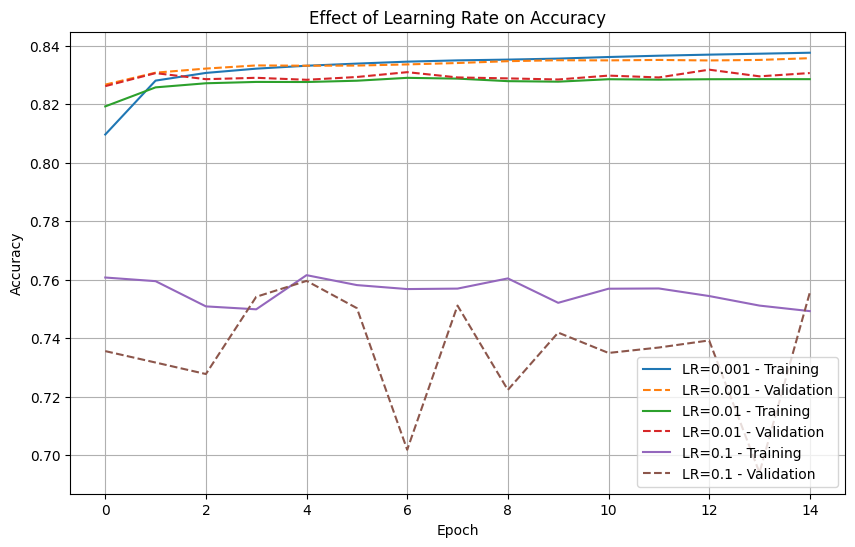

In [26]:
# Dictionary to store histories for different learning rates
histories_lr = {}

# Define learning rates to test
learning_rates = [0.001, 0.01, 0.1]

for lr in learning_rates:
    print(f"Training with learning rate: {lr}...")

    # Define the model
    model = Sequential([
        Dense(64, activation='tanh', input_shape=(x_train.shape[1],)),
        Dense(32, activation='tanh'),
        Dense(16, activation='tanh'),
        Dense(y_train.shape[1], activation='softmax')
    ])

    # Compile the model with the current learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model
    history = model.fit(
        x_train, y_train,
        epochs=15,
        batch_size=128,
        validation_split=0.1,
        verbose=1  # Suppress detailed logs
    )

    # Store the history for this learning rate
    histories_lr[lr] = history.history

# Plotting results
plt.figure(figsize=(10, 6))
for lr, history in histories_lr.items():
    plt.plot(history['accuracy'], label=f'LR={lr} - Training')
    plt.plot(history['val_accuracy'], linestyle='--', label=f'LR={lr} - Validation')

plt.title('Effect of Learning Rate on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Training with dropout rate: 0.0...
Epoch 1/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7869 - loss: 0.5310 - val_accuracy: 0.8276 - val_loss: 0.4437
Epoch 2/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8272 - loss: 0.4409 - val_accuracy: 0.8312 - val_loss: 0.4309
Epoch 3/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8302 - loss: 0.4305 - val_accuracy: 0.8328 - val_loss: 0.4269
Epoch 4/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8323 - loss: 0.4260 - val_accuracy: 0.8342 - val_loss: 0.4245
Epoch 5/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8330 - loss: 0.4230 - val_accuracy: 0.8345 - val_loss: 0.4226
Epoch 6/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8340 - loss: 0.4207 - val_accuracy: 0.8347 - val_loss: 0.4212
Epoch 7/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8348 - loss: 0.4187 - val_accuracy: 0.8351 - val_loss: 0.4201
Epoch 8/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step

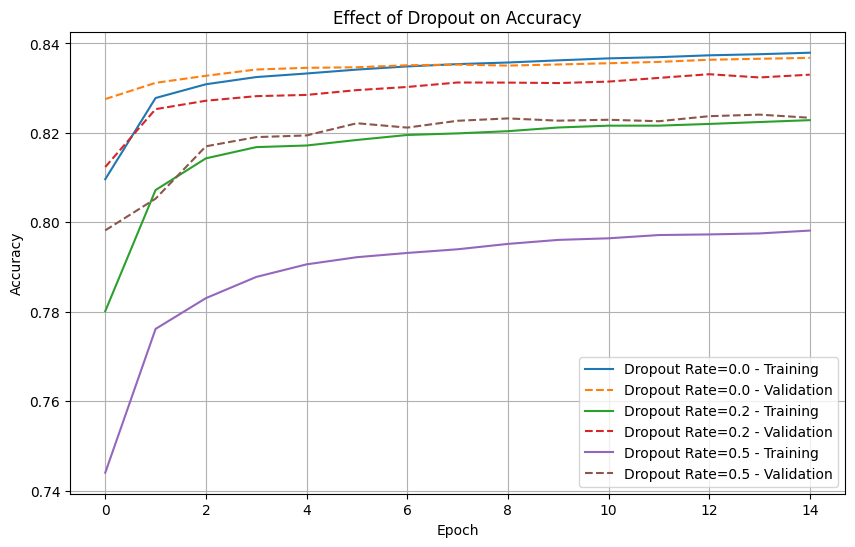

In [27]:
from tensorflow.keras.layers import Dropout

# Dictionary to store histories for different dropout rates
histories_dropout = {}

# Define dropout rates to test
dropout_rates = [0.0, 0.2, 0.5]  # 0.0 is the baseline (no dropout)

for rate in dropout_rates:
    print(f"Training with dropout rate: {rate}...")

    # Define the model
    model = Sequential([
        Dense(64, activation='tanh', input_shape=(x_train.shape[1],)),
        Dropout(rate) if rate > 0 else tf.keras.layers.Lambda(lambda x: x),  # Add dropout if rate > 0
        Dense(32, activation='tanh'),
        Dropout(rate) if rate > 0 else tf.keras.layers.Lambda(lambda x: x),
        Dense(16, activation='tanh'),
        Dropout(rate) if rate > 0 else tf.keras.layers.Lambda(lambda x: x),
        Dense(y_train.shape[1], activation='softmax')
    ])

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Use the best learning rate
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    # Train the model
    history = model.fit(
        x_train, y_train,
        epochs=15,
        batch_size=128,
        validation_split=0.1,
        verbose=1  # Suppress detailed logs
    )

    # Store the history for this dropout rate
    histories_dropout[rate] = history.history

# Plotting results
plt.figure(figsize=(10, 6))
for rate, history in histories_dropout.items():
    label = f'Dropout Rate={rate}'
    plt.plot(history['accuracy'], label=f'{label} - Training')
    plt.plot(history['val_accuracy'], linestyle='--', label=f'{label} - Validation')

plt.title('Effect of Dropout on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Define the model
best_model = Sequential([
    Dense(64, activation='tanh', input_shape=(x_train.shape[1],)),
    Dense(32, activation='tanh'),
    Dense(16, activation='tanh'),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model with the current learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
best_model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = best_model.fit(
    x_train, y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.1,
    verbose=1  # Suppress detailed logs
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7837 - loss: 0.5347 - val_accuracy: 0.8284 - val_loss: 0.4424
Epoch 2/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8277 - loss: 0.4410 - val_accuracy: 0.8311 - val_loss: 0.4310
Epoch 3/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.8305 - loss: 0.4313 - val_accuracy: 0.8330 - val_loss: 0.4267
Epoch 4/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8322 - loss: 0.4265 - val_accuracy: 0.8338 - val_loss: 0.4244
Epoch 5/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8334 - loss: 0.4234 - val_accuracy: 0.8338 - val_loss: 0.4230
Epoch 6/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.8342 - loss: 0.4212 - val_accuracy: 0.8343 - val_loss: 0.4220
Epoch 7/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8347 - loss: 0.4195 - val_accuracy: 0.8350 - val_loss: 0.4212
Epoch 8/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8352 - loss: 0.4181 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7848 - loss: 0.5333 - val_accuracy: 0.8258 - val_loss: 0.4473
Epoch 2/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8261 - loss: 0.4444 - val_accuracy: 0.8301 - val_loss: 0.4333
Epoch 3/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8298 - loss: 0.4323 - val_accuracy: 0.8321 - val_loss: 0.4284
Epoch 4/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8311 - loss: 0.4271 - val_accuracy: 0.8330 - val_loss: 0.4256
Epoch 5/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8324 - loss: 0.4240 - val_accuracy: 0.8335 - val_loss: 0.4233
Epoch 6/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8328 - loss: 0.4217 - val_accuracy: 0.8340 - val_loss: 0.4215
Epoch 7/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8336 - loss: 0.4198 - val_accuracy: 0.8344 - val_loss: 0.4200
Epoch 8/15
2809/2809 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.8341 - loss: 0.4182 

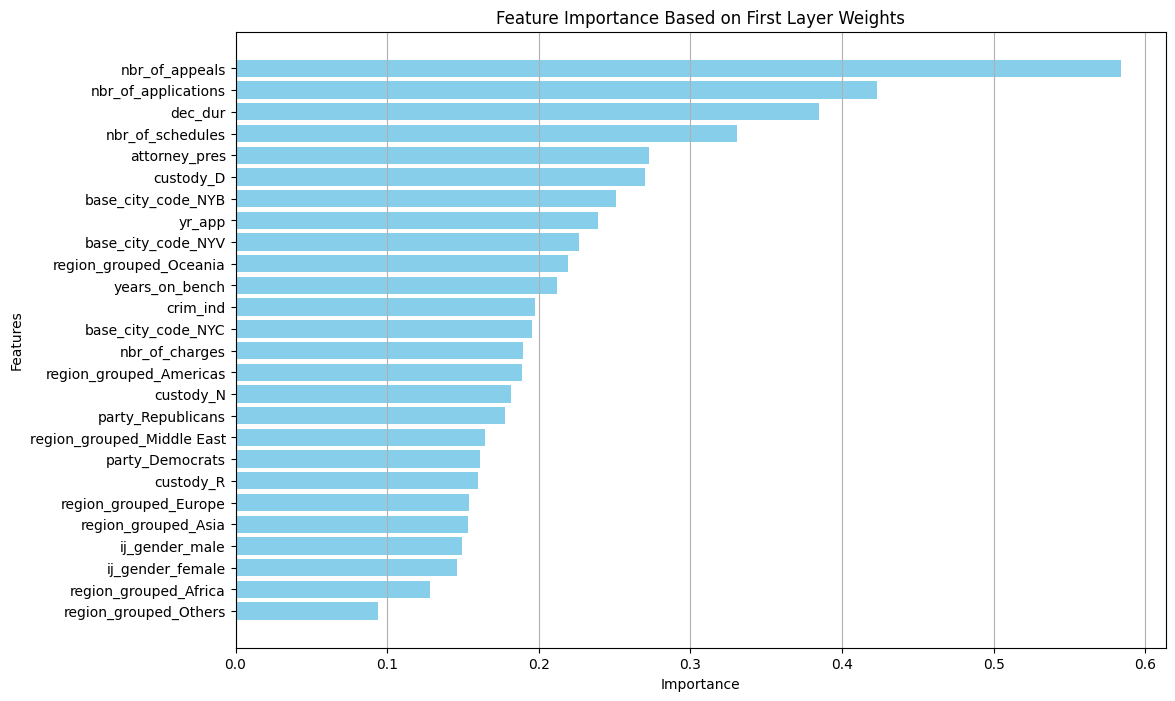

In [31]:

# Get the weights of the first dense layer
first_layer_weights, first_layer_biases = best_model.layers[0].get_weights()

# Aggregate the weights by taking the mean of absolute values across neurons
feature_importance = np.mean(np.abs(first_layer_weights), axis=1)

# Map the aggregated weights back to feature names
feature_names = [
    'dec_dur', 'nbr_of_charges', 'nbr_of_applications', 'nbr_of_schedules',
    'crim_ind', 'nbr_of_appeals', 'attorney_pres', 'yr_app', 'years_on_bench',
    'base_city_code_NYB', 'base_city_code_NYC', 'base_city_code_NYV',
    'custody_D', 'custody_N', 'custody_R',
    'ij_gender_male', 'ij_gender_female',
    'party_Democrats', 'party_Republicans',
    'region_grouped_Africa', 'region_grouped_Americas', 'region_grouped_Asia',
    'region_grouped_Europe', 'region_grouped_Middle East', 'region_grouped_Oceania',
    'region_grouped_Others'
]

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance Based on First Layer Weights')
plt.gca().invert_yaxis()
plt.grid(True, axis='x')
plt.show()


ValueError: The layer sequential has never been called and thus has no defined input.

In [29]:
print(X.dtypes)

dec_dur                       float64
nbr_of_charges                float64
nbr_of_applications           float64
nbr_of_schedules              float64
crim_ind                      float64
nbr_of_appeals                float64
attorney_pres                 float64
yr_app                        float64
years_on_bench                float64
base_city_code_NYB               bool
base_city_code_NYC               bool
base_city_code_NYV               bool
custody_D                        bool
custody_N                        bool
custody_R                        bool
ij_gender_male                   bool
ij_gender_female                 bool
party_Democrats                  bool
party_Republicans                bool
region_grouped_Africa            bool
region_grouped_Americas          bool
region_grouped_Asia              bool
region_grouped_Europe            bool
region_grouped_Middle East       bool
region_grouped_Oceania           bool
region_grouped_Others            bool
dtype: objec

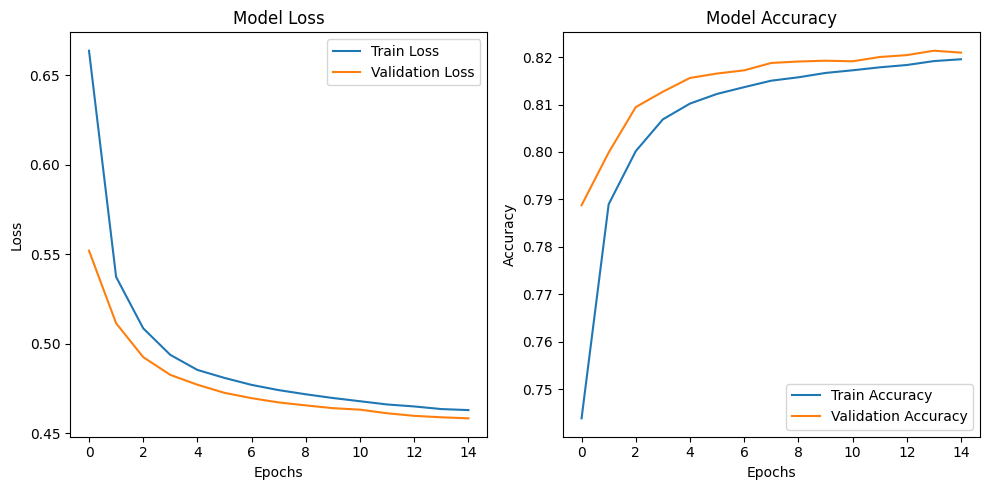

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1388/1388 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


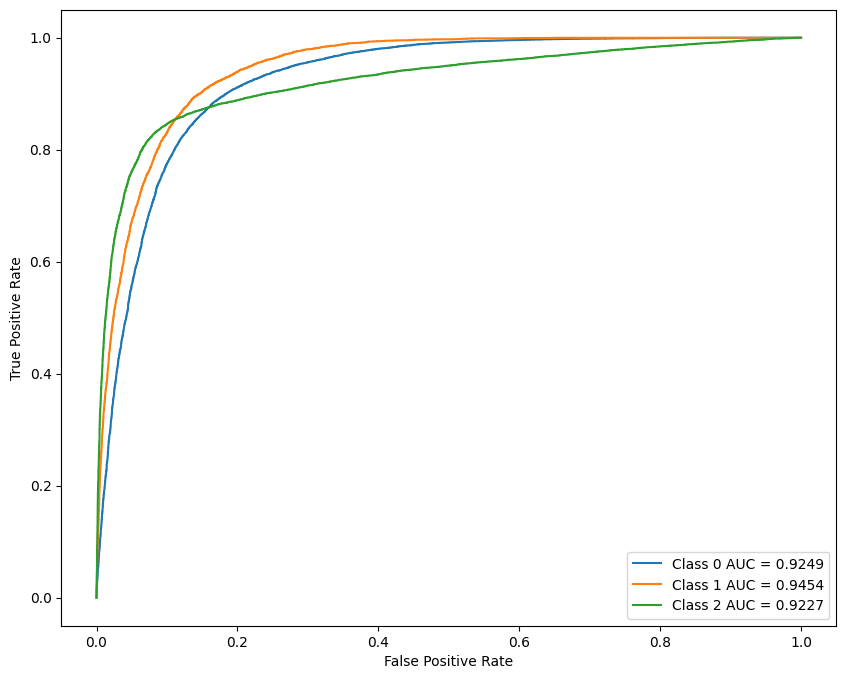

In [14]:
from sklearn.metrics import roc_curve, auc

# Calcola il ROC per ogni classe
fpr = {}
tpr = {}
thresh ={}
roc_auc = {}
for i in range(y_train.shape[1]):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test[:, i], nn3.predict(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(10, 8))
for i in range(y_train.shape[1]):
    plt.plot(fpr[i], tpr[i], linestyle='-', label=f'Class {i} AUC = {roc_auc[i]:.4f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
